# Covid 19 Data Exploration

## Import libraries

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

C:\Users\Thu Pham\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load dataset

In [3]:
# Import dataset and explore the first 5 rows
df = pd.read_csv('data.csv')
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


## Assess and Clean Data

In [4]:
# Concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     61900 non-null  object 
 1   day                                                         61900 non-null  int64  
 2   month                                                       61900 non-null  int64  
 3   year                                                        61900 non-null  int64  
 4   cases                                                       61900 non-null  int64  
 5   deaths                                                      61900 non-null  int64  
 6   countriesAndTerritories                                     61900 non-null  object 
 7   geoId                                                       61625 non-null  object 
 

dateRep has datatype object instead of datetime. We will need to convert this one to the right datatype.

In [5]:
df['dateRep'] = pd.to_datetime(df['dateRep'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   dateRep                                                     61900 non-null  datetime64[ns]
 1   day                                                         61900 non-null  int64         
 2   month                                                       61900 non-null  int64         
 3   year                                                        61900 non-null  int64         
 4   cases                                                       61900 non-null  int64         
 5   deaths                                                      61900 non-null  int64         
 6   countriesAndTerritories                                     61900 non-null  object        
 7   geoId                 

In [6]:
# Useful descriptive statistics
df.describe()

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,61900.000000,61900.000000,61900.000000,61900.000000,61900.000000,6.177700e+04,59021.000000
mean,15.628934,7.067157,2019.998918,1155.147237,26.055460,4.098770e+07,66.320586
std,8.841582,2.954776,0.032882,6779.224479,131.227055,1.531294e+08,162.329240
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02,-147.419587
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.293120e+06,0.757526
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.169456e+06,6.724045
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,2.851583e+07,52.572719
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09,1900.836210


For cases, deaths, and Cumulative_number_for_14_days_of_COVID-19_cases_per_100000, there are negative values, which do not make sense. We will need to drop these values.

In [7]:
# Drop negative values
df.drop(df[df['deaths'] < 0].index, inplace = True)
df.drop(df[df['cases'] < 0].index, inplace = True)
df.drop(df[df['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'] < 0].index, inplace = True)
df.describe()

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,61837.000000,61837.000000,61837.000000,61837.000000,61837.000000,6.171500e+04,58959.000000
mean,15.628588,7.067452,2019.998917,1156.498714,26.048256,4.101530e+07,66.402666
std,8.839442,2.955783,0.032899,6782.438983,130.153443,1.532030e+08,162.373044
min,1.000000,1.000000,2019.000000,0.000000,0.000000,8.150000e+02,0.000000
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.293120e+06,0.763241
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.169456e+06,6.732521
75%,23.000000,10.000000,2020.000000,275.000000,4.000000,2.851583e+07,52.601692
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09,1900.836210


In [8]:
# Return the number of duplicated rows
df.duplicated().sum()

0

In [9]:
# Return the number of missing values in each column
df.isna().sum()

dateRep                                                          0
day                                                              0
month                                                            0
year                                                             0
cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
geoId                                                          275
countryterritoryCode                                           122
popData2019                                                    122
continentExp                                                     0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2878
dtype: int64

There are 122 missing values for popData2019 and 2878 missing values for Cumulative_number_for_14_days_of_COVID-19_cases_per_100000. We will replace those missing values with medians. Besides, geoId and countryterritoryCode are unnecessary.

In [10]:
# Drop geoId and countryterritoryCode
df.drop(columns=['geoId', 'countryterritoryCode'], inplace=True)

In [11]:
# Replace missing values in popData2019 with median value
popData2019_median = df['popData2019'].median()
df['popData2019'].fillna(popData2019_median, inplace=True)
Cumulative_number_for_14_days_of_COVID_19_cases_per_100000_median = df['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'].median()
df['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'].fillna(Cumulative_number_for_14_days_of_COVID_19_cases_per_100000_median, inplace=True)
df.isna().sum()

dateRep                                                       0
day                                                           0
month                                                         0
year                                                          0
cases                                                         0
deaths                                                        0
countriesAndTerritories                                       0
popData2019                                                   0
continentExp                                                  0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    0
dtype: int64

In [12]:
# Create column death_rate_per_million
df['death_rate_per_million'] = df['deaths'] / df['popData2019'] * 1000000
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,death_rate_per_million
0,2020-12-14,14,12,2020,746,6,Afghanistan,38041757.0,Asia,9.013779,0.157721
1,2020-12-13,13,12,2020,298,9,Afghanistan,38041757.0,Asia,7.052776,0.236582
2,2020-12-12,12,12,2020,113,11,Afghanistan,38041757.0,Asia,6.868768,0.289156
3,2020-11-12,11,12,2020,63,10,Afghanistan,38041757.0,Asia,7.134266,0.262869
4,2020-10-12,10,12,2020,202,16,Afghanistan,38041757.0,Asia,6.968658,0.420590
...,...,...,...,...,...,...,...,...,...,...,...
61895,2020-03-25,25,3,2020,0,0,Zimbabwe,14645473.0,Africa,6.732521,0.000000
61896,2020-03-24,24,3,2020,0,1,Zimbabwe,14645473.0,Africa,6.732521,0.068280
61897,2020-03-23,23,3,2020,0,0,Zimbabwe,14645473.0,Africa,6.732521,0.000000
61898,2020-03-22,22,3,2020,1,0,Zimbabwe,14645473.0,Africa,6.732521,0.000000


## Explore Data

### Countries and Territories

In [13]:
df.groupby('continentExp')['countriesAndTerritories'].nunique()

continentExp
Africa     55
America    49
Asia       42
Europe     55
Oceania    12
Other       1
Name: countriesAndTerritories, dtype: int64

### Cases

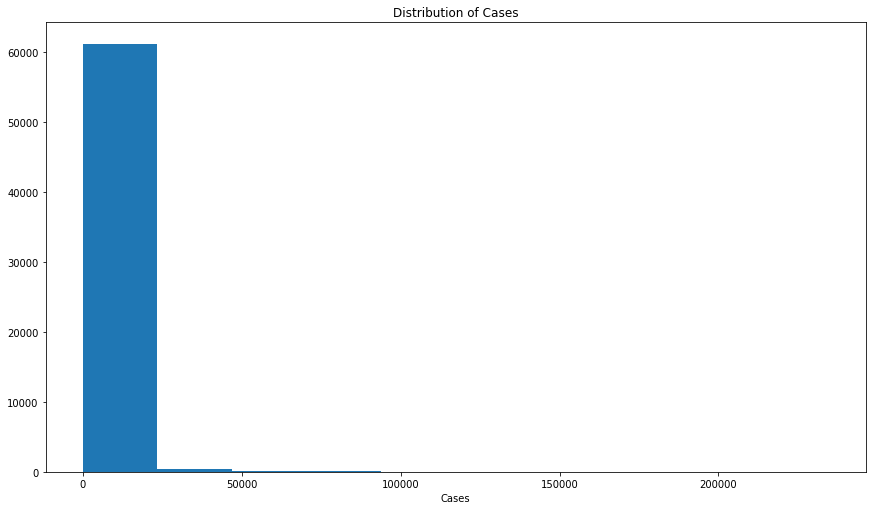

In [14]:
plt.figure(figsize=[14.70, 8.27])
plt.hist(df['cases'])
plt.title('Distribution of Cases')
plt.xlabel('Cases');

Most the numbers of cases are under 50000 with a very small proportion that is larger than 50000. The highest number recorded is 234633. To make it easier to analyze, we can divide the this column into 3 categories: low (x <= 15), medium (15 <= x <= 1000), and high (x >= 1000).

In [15]:
cases_category = []

for case in df['cases']:
    if case <= 15:
        cases_category.append('Low')
    elif case <= 1000:
        cases_category.append('Medium')
    else:
        cases_category.append('High')

df['Case Category'] = cases_category

df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,death_rate_per_million,Case Category
0,2020-12-14,14,12,2020,746,6,Afghanistan,38041757.0,Asia,9.013779,0.157721,Medium
1,2020-12-13,13,12,2020,298,9,Afghanistan,38041757.0,Asia,7.052776,0.236582,Medium
2,2020-12-12,12,12,2020,113,11,Afghanistan,38041757.0,Asia,6.868768,0.289156,Medium
3,2020-11-12,11,12,2020,63,10,Afghanistan,38041757.0,Asia,7.134266,0.262869,Medium
4,2020-10-12,10,12,2020,202,16,Afghanistan,38041757.0,Asia,6.968658,0.420590,Medium


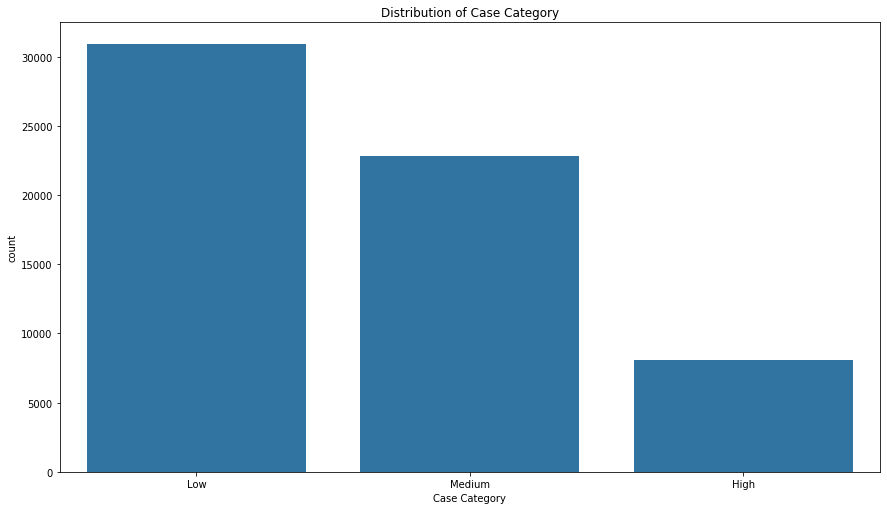

In [16]:
plt.figure(figsize=[14.70, 8.27])

case_order = ['Low','Medium','High']
base_color = sns.color_palette()[0]
sns.countplot(data=df, x='Case Category', color=base_color, order=case_order)
plt.title('Distribution of Case Category');

In [17]:
df['Case Category'].value_counts() / df['cases'].count() * 100

Low       50.063878
Medium    36.884066
High      13.052056
Name: Case Category, dtype: float64

50.06% of the cases is below 15. 36.88% of the cases is between 15 and 1000. And only 13.05% of the cases is higher than 1000.

### Deaths

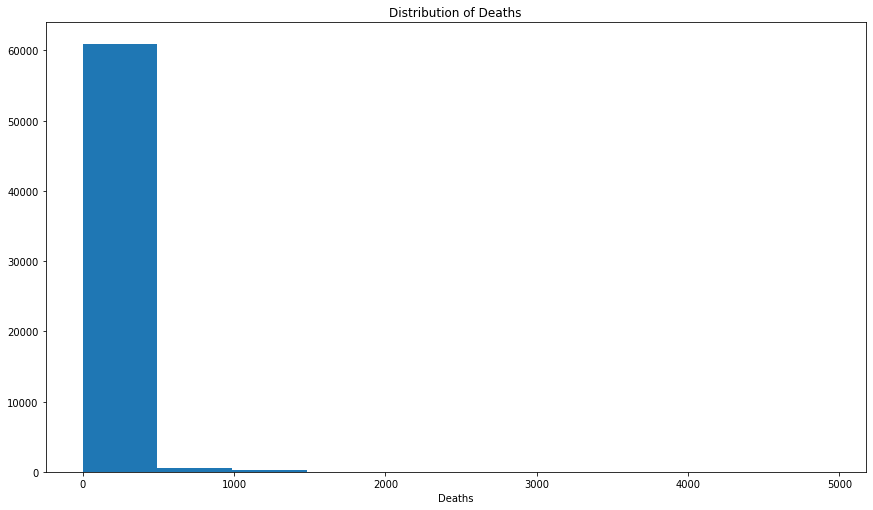

In [18]:
plt.figure(figsize=[14.70, 8.27])
plt.hist(df['deaths'])
plt.title('Distribution of Deaths')
plt.xlabel('Deaths');

Most the numbers of deaths are under 100 with a very small proportion that is larger than 100. The highest number recorded is 4928. To make it easier to analyze, we can divide the this column into 3 categories: low (x <= 5), medium (5 <= x <= 1000), and high (x >= 1000).

In [19]:
death_category = []

for death in df['deaths']:
    if death <= 15:
        death_category.append('Low')
    elif death <= 1000:
        death_category.append('Medium')
    else:
        death_category.append('High')

df['Death Category'] = death_category

df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,death_rate_per_million,Case Category,Death Category
0,2020-12-14,14,12,2020,746,6,Afghanistan,38041757.0,Asia,9.013779,0.157721,Medium,Low
1,2020-12-13,13,12,2020,298,9,Afghanistan,38041757.0,Asia,7.052776,0.236582,Medium,Low
2,2020-12-12,12,12,2020,113,11,Afghanistan,38041757.0,Asia,6.868768,0.289156,Medium,Low
3,2020-11-12,11,12,2020,63,10,Afghanistan,38041757.0,Asia,7.134266,0.262869,Medium,Low
4,2020-10-12,10,12,2020,202,16,Afghanistan,38041757.0,Asia,6.968658,0.420590,Medium,Medium


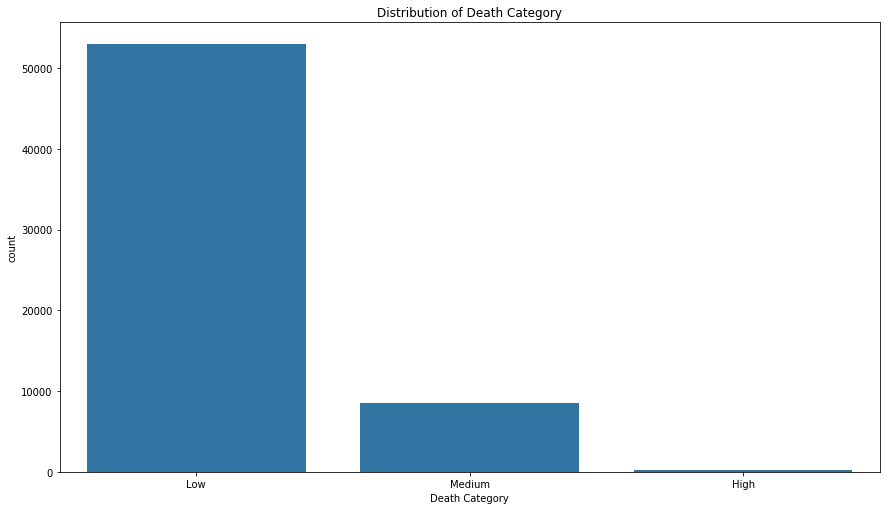

In [43]:
plt.figure(figsize=[14.70, 8.27])

death_order = ['Low','Medium','High']
base_color = sns.color_palette()[0]
sns.countplot(data=df, x='Death Category', color=base_color, order=death_order)
plt.title('Distribution of Death Category');

In [21]:
df['Death Category'].value_counts() / df['deaths'].count() * 100

Low       85.731843
Medium    13.839611
High       0.428546
Name: Death Category, dtype: float64

85.73% of the deaths is below 5. 13.84% of the cases is between 5 and 1000. And only 0.43% of the cases is higher than 1000.

In [22]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df['deaths_normalized'] = df['deaths']
df[["deaths_normalized"]] = min_max_scaler.fit_transform(df[["deaths_normalized"]])
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,death_rate_per_million,Case Category,Death Category,deaths_normalized
0,2020-12-14,14,12,2020,746,6,Afghanistan,38041757.0,Asia,9.013779,0.157721,Medium,Low,0.001218
1,2020-12-13,13,12,2020,298,9,Afghanistan,38041757.0,Asia,7.052776,0.236582,Medium,Low,0.001826
2,2020-12-12,12,12,2020,113,11,Afghanistan,38041757.0,Asia,6.868768,0.289156,Medium,Low,0.002232
3,2020-11-12,11,12,2020,63,10,Afghanistan,38041757.0,Asia,7.134266,0.262869,Medium,Low,0.002029
4,2020-10-12,10,12,2020,202,16,Afghanistan,38041757.0,Asia,6.968658,0.420590,Medium,Medium,0.003247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61895,2020-03-25,25,3,2020,0,0,Zimbabwe,14645473.0,Africa,6.732521,0.000000,Low,Low,0.000000
61896,2020-03-24,24,3,2020,0,1,Zimbabwe,14645473.0,Africa,6.732521,0.068280,Low,Low,0.000203
61897,2020-03-23,23,3,2020,0,0,Zimbabwe,14645473.0,Africa,6.732521,0.000000,Low,Low,0.000000
61898,2020-03-22,22,3,2020,1,0,Zimbabwe,14645473.0,Africa,6.732521,0.000000,Low,Low,0.000000


In [44]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df['deaths_standardized'] = df['deaths']
df[["deaths_standardized"]] = standard_scaler.fit_transform(df[["deaths_standardized"]])
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,death_rate_per_million,Case Category,Death Category,deaths_normalized,deaths_standardized,month_year
0,2020-12-14,14,12,2020,746,6,Afghanistan,38041757.0,Asia,9.013779,0.157721,Medium,Low,0.001218,-0.154037,2020-12
1,2020-12-13,13,12,2020,298,9,Afghanistan,38041757.0,Asia,7.052776,0.236582,Medium,Low,0.001826,-0.130987,2020-12
2,2020-12-12,12,12,2020,113,11,Afghanistan,38041757.0,Asia,6.868768,0.289156,Medium,Low,0.002232,-0.115620,2020-12
3,2020-11-12,11,12,2020,63,10,Afghanistan,38041757.0,Asia,7.134266,0.262869,Medium,Low,0.002029,-0.123304,2020-12
4,2020-10-12,10,12,2020,202,16,Afghanistan,38041757.0,Asia,6.968658,0.420590,Medium,Medium,0.003247,-0.077204,2020-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61895,2020-03-25,25,3,2020,0,0,Zimbabwe,14645473.0,Africa,6.732521,0.000000,Low,Low,0.000000,-0.200137,2020-03
61896,2020-03-24,24,3,2020,0,1,Zimbabwe,14645473.0,Africa,6.732521,0.068280,Low,Low,0.000203,-0.192453,2020-03
61897,2020-03-23,23,3,2020,0,0,Zimbabwe,14645473.0,Africa,6.732521,0.000000,Low,Low,0.000000,-0.200137,2020-03
61898,2020-03-22,22,3,2020,1,0,Zimbabwe,14645473.0,Africa,6.732521,0.000000,Low,Low,0.000000,-0.200137,2020-03


### Cumulative Number for 14 Days of Covid 19 Cases per 100000

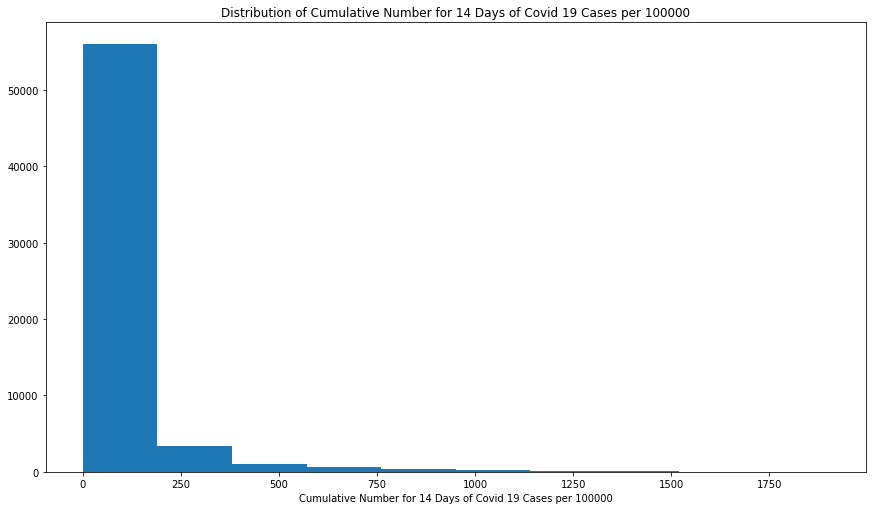

In [24]:
plt.figure(figsize=[14.70, 8.27])
plt.hist(df['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'])
plt.title('Distribution of Cumulative Number for 14 Days of Covid 19 Cases per 100000')
plt.xlabel('Cumulative Number for 14 Days of Covid 19 Cases per 100000');

Most of the cumulative numbers for 14 days of Covid 19 cases are 300 or lower. There is a small proportion where the numbers are higher than 300. The highest recorded is 1900.

### Death Rate per Million and Continent

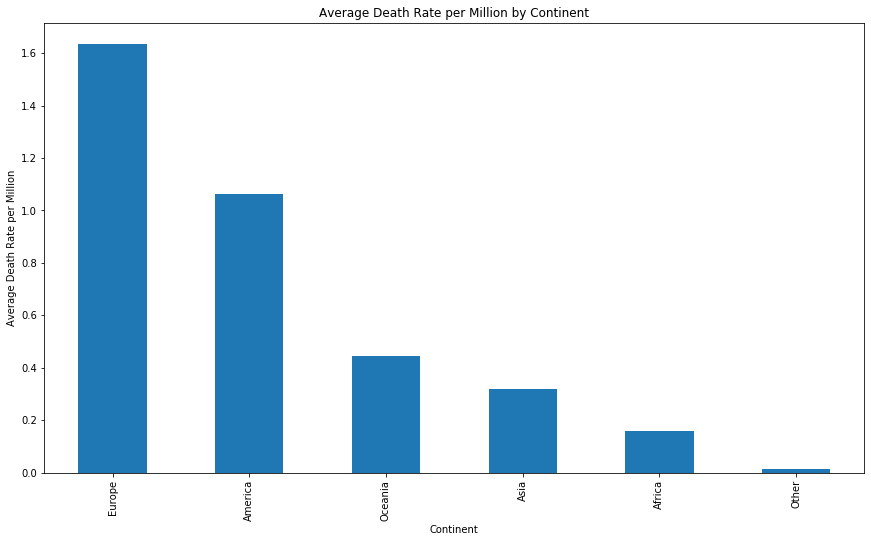

In [25]:
# Create a bar plot for death_rate_per_million and continentExp
df.groupby('continentExp')['death_rate_per_million'].agg('mean').sort_values(ascending=False).plot.bar(figsize=(14.70, 8.27))
plt.title('Average Death Rate per Million by Continent')
plt.ylabel('Average Death Rate per Million')
plt.xlabel('Continent');

In [26]:
df.groupby('continentExp')['death_rate_per_million'].agg('mean').sort_values(ascending=False)

continentExp
Europe     1.633283
America    1.061761
Oceania    0.444217
Asia       0.318815
Africa     0.157850
Other      0.013284
Name: death_rate_per_million, dtype: float64

Europe has the highest death rate per million people (1.63). Africa (0.16) and Other (0.01) have the lowest death rates per million people. For every 1 million people, there are 1.08 deaths in America, 0.45 death in Oceania, and 0.31 death in Asia.

### Number of Cases and Continent

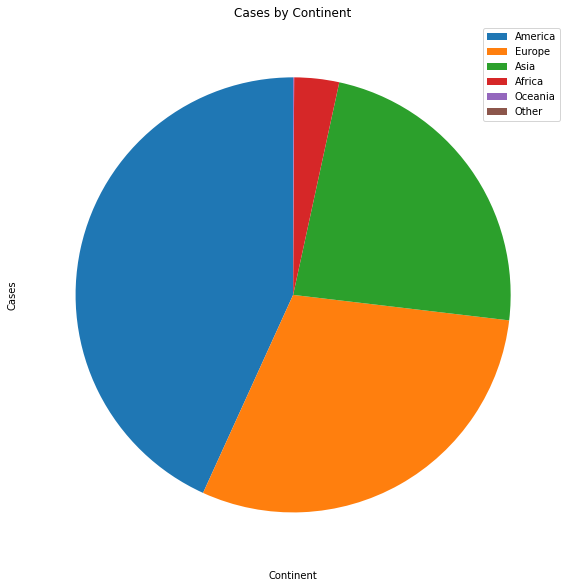

In [27]:
df.groupby('continentExp')['cases'].agg('sum').sort_values(ascending=False).plot.pie(figsize=(14.70, 8.27), \
                                                                                      startangle=90, \
                                                                                      labeldistance=None)
plt.title('Cases by Continent')
plt.ylabel('Cases')
plt.xlabel('Continent')
plt.legend()
plt.tight_layout();

In [28]:
df.groupby('continentExp')['cases'].agg('sum') / df['cases'].sum() * 100

continentExp
Africa      3.328055
America    43.207858
Asia       23.466339
Europe     29.922036
Oceania     0.074726
Other       0.000986
Name: cases, dtype: float64

The majority of Covid-19 cases (43.21%) is in America. Other Continent and Oceania have the lowest percentages of 0.00% and 0.07%. Africa constitues 3.33%, Asia 23.47%, and Europe 29.92%.

### Number of Deaths and Continent

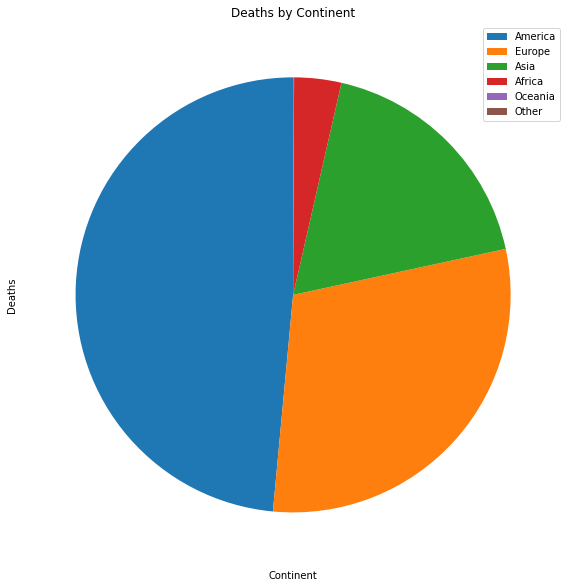

In [29]:
df.groupby('continentExp')['deaths'].agg('sum').sort_values(ascending=False).plot.pie(figsize=(14.70, 8.27), \
                                                                                      startangle=90, \
                                                                                      labeldistance=None)
plt.title('Deaths by Continent')
plt.ylabel('Deaths')
plt.xlabel('Continent')
plt.legend()
plt.tight_layout();

In [30]:
df.groupby('continentExp')['deaths'].agg('sum') / df['deaths'].sum() * 100

continentExp
Africa      3.497324
America    48.518078
Asia       18.039592
Europe     29.872991
Oceania     0.071644
Other       0.000372
Name: deaths, dtype: float64

The majority of Covid-19 deaths (48.52%) is in America. Other Continent and Oceania have the lowest percentages of 0.00% and 0.07%. Africa constitues 3.50%, Asia 18.04%, and Europe 29.87%.

### Number of Deaths and Timeline

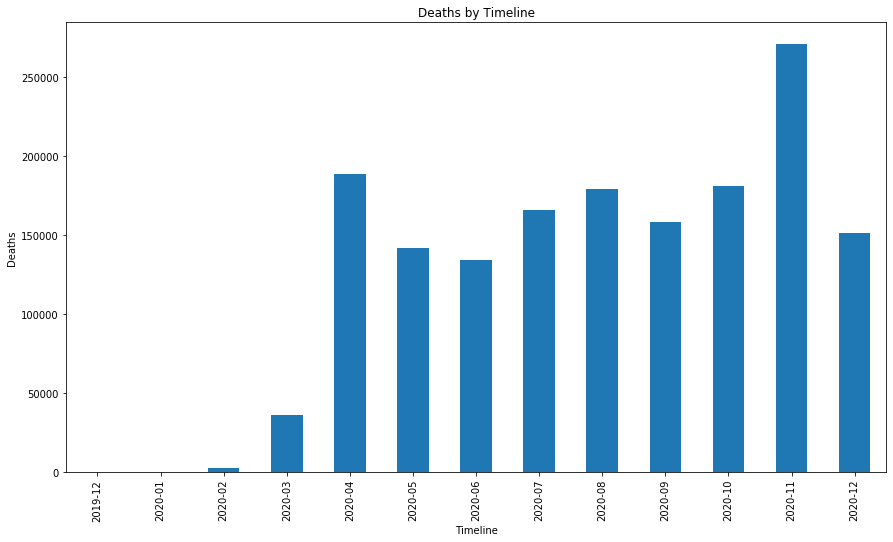

In [31]:
df['month_year'] = df['year'].map(str)+ '-' +df['month'].map(str)
df['month_year'] = pd.to_datetime(df['month_year'], format='%Y-%m').dt.strftime('%Y-%m')

df.groupby('month_year')['deaths'].agg('sum').plot.bar(figsize=(14.70, 8.27))
plt.title('Deaths by Timeline')
plt.ylabel('Deaths')
plt.xlabel('Timeline');

In [32]:
df.groupby('month_year')['deaths'].agg('sum')

month_year
2019-12         0
2020-01       213
2020-02      2708
2020-03     35813
2020-04    188767
2020-05    141926
2020-06    133946
2020-07    166199
2020-08    179075
2020-09    158369
2020-10    181059
2020-11    271086
2020-12    151585
Name: deaths, dtype: int64

11/2020 has the highest number of deaths (271086) while 12/2019 has the lowest number of deaths. There is a big increase of 152,954 deaths between the total numbers in 3/2020 and 4/2020. From 10/2020 to 11/2020, there is an increase of 90,027 deaths. The total numbers of deaths for the majority of the months fluctuate around 150,000 deaths.

### Number of Cases and Timeline

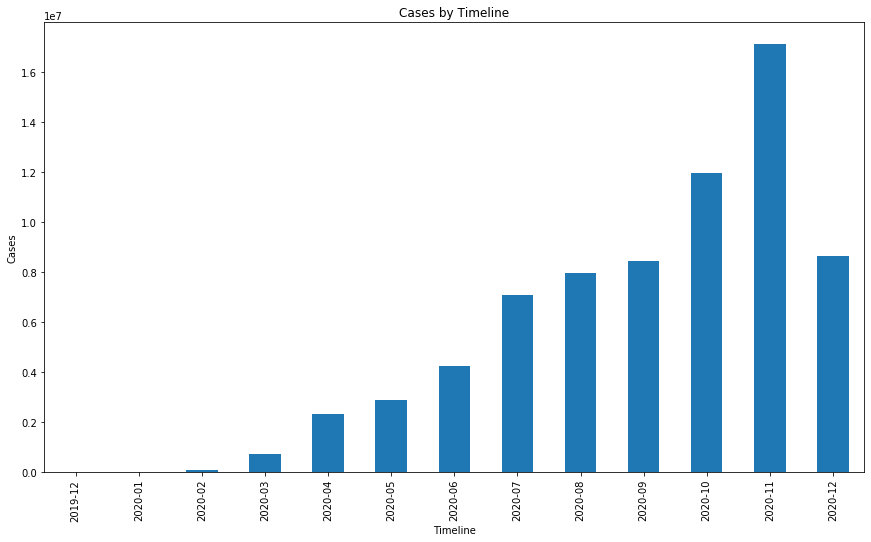

In [33]:
df.groupby('month_year')['cases'].agg('sum').plot.bar(figsize=(14.70, 8.27))
plt.title('Cases by Timeline')
plt.ylabel('Cases')
plt.xlabel('Timeline');

In [34]:
df.groupby('month_year')['cases'].agg('sum')

month_year
2019-12          27
2020-01        9799
2020-02       75422
2020-03      723747
2020-04     2340412
2020-05     2896751
2020-06     4249852
2020-07     7067360
2020-08     7961485
2020-09     8464117
2020-10    11948575
2020-11    17134026
2020-12     8642838
Name: cases, dtype: int64

11/2020 has the highest number of cases (17,134,026) while 12/2019 has the lowest number of cases (27). The number of cases has the tendency to increase from 12/2019 to 11/2020 and drops in 12/2020. There is a big increase of cases (5,185,451) from 10/2020 to 11/2020 and a big decrease of cases (8,491,188) from 11/2020 to 12/2020.

### Death Rate per Million and Timeline

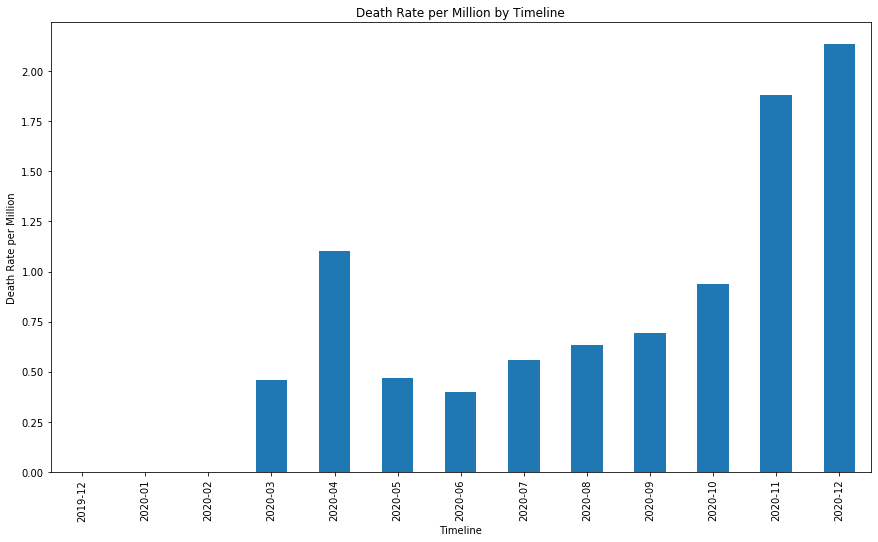

In [35]:
df.groupby('month_year')['death_rate_per_million'].agg('mean').plot.bar(figsize=(14.70, 8.27))
plt.title('Death Rate per Million by Timeline')
plt.ylabel('Death Rate per Million')
plt.xlabel('Timeline');

In [36]:
df.groupby('month_year')['death_rate_per_million'].agg('mean')

month_year
2019-12    0.000000
2020-01    0.000072
2020-02    0.001977
2020-03    0.460093
2020-04    1.104600
2020-05    0.470797
2020-06    0.400290
2020-07    0.558771
2020-08    0.634324
2020-09    0.693824
2020-10    0.936541
2020-11    1.881009
2020-12    2.135232
Name: death_rate_per_million, dtype: float64

12/2020 (2.14), 11/2020 (1.88) and 04/2020 (1.10) have the highest average death rates per million people. From 12/2019 to 20/2020, the rates are nearly 0. For other months in 2020, the rates fluctuate around 0.5 to 0.80.

### Top 5 Countries & Territories with Highest Number of Cases

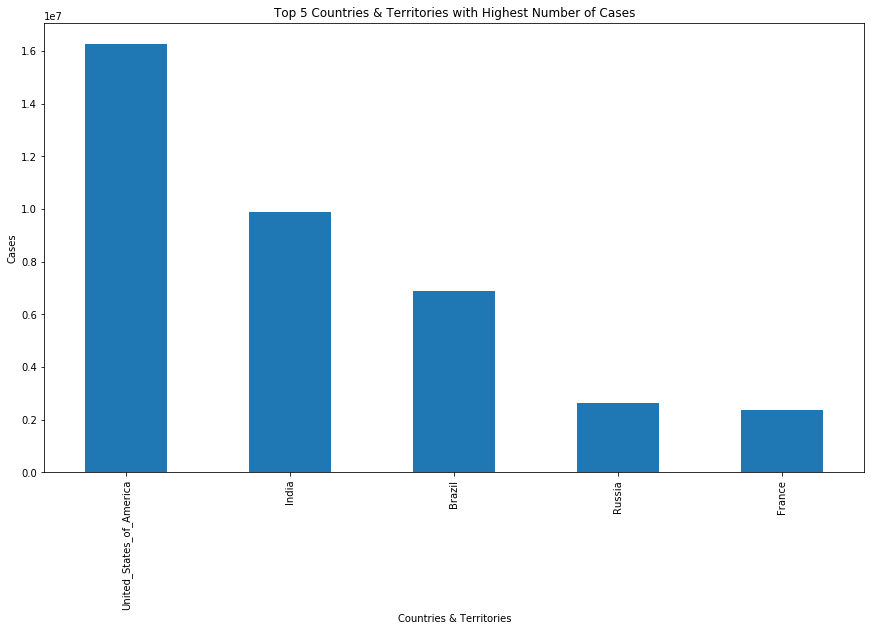

In [37]:
df.groupby('countriesAndTerritories')['cases'].agg('sum').sort_values(ascending=False).head(n=5).plot.bar(figsize=(14.70, 8.27))
plt.title('Top 5 Countries & Territories with Highest Number of Cases')
plt.ylabel('Cases')
plt.xlabel('Countries & Territories');

In [38]:
df.groupby('countriesAndTerritories')['cases'].agg('sum').sort_values(ascending=False).head(n=5)

countriesAndTerritories
United_States_of_America    16256754
India                        9884100
Brazil                       6901952
Russia                       2653928
France                       2377618
Name: cases, dtype: int64

We can see that America has the highest number of cases (16256754), followed by India (9884100), Brazil (6901952), Russia (2653928) and France (2377618).

### Top 5 Countries & Territories with Highest Number of Deaths

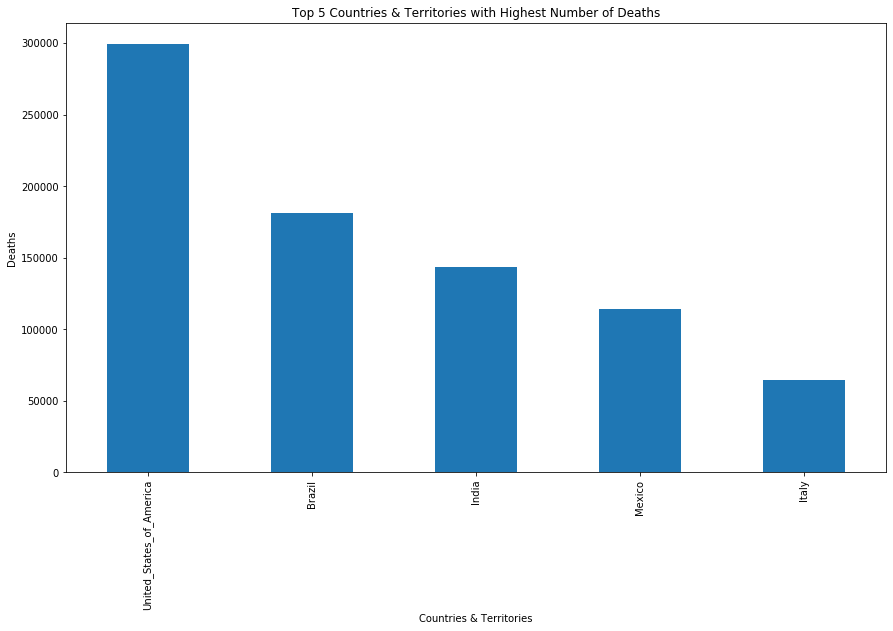

In [39]:
df.groupby('countriesAndTerritories')['deaths'].agg('sum').sort_values(ascending=False).head(n=5).plot.bar(figsize=(14.70, 8.27))
plt.title('Top 5 Countries & Territories with Highest Number of Deaths')
plt.ylabel('Deaths')
plt.xlabel('Countries & Territories');

In [40]:
df.groupby('countriesAndTerritories')['deaths'].agg('sum').sort_values(ascending=False).head(n=5)

countriesAndTerritories
United_States_of_America    299177
Brazil                      181402
India                       143355
Mexico                      113953
Italy                        64504
Name: deaths, dtype: int64

We can see that America has the highest number of deaths (299177), followed by Brazil (181402), India (143355), Mexico (113953), and Italy (64504). The US, India, and Brazil appear in both categories highest number of cases and deaths.